<p style="align: center;"><img src="http://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png" width=400 height=100></p>

## <h3 style="text-align: center;"><b>Installing PyTorch</b>

Go to [pytorch.org](https://pytorch.org/) and install PyTorch version choosing your system preferences.

In [373]:
import torch

PyTorch is a deep learning framework, build on 3 main components.

$$ PyTorch = NumPy + CUDA +Autograd$$

PyTorch works with ``tensor`` data structure, which is similar to NumPy's ``ndarray``, except that:
 1. tensors can run on GPUs or other hardware accelerators via [CUDA](http://en.wikipedia.org/wiki/CUDA)
 2. tensors are also optimized for automatic differentiation (Autograd)

Tensor is a multi-dimensional array:
- a scalar is a zero dimensional tensor : `` x = 9 # shape ([])``
- a vector, is a 1d tensor : `` y = [9, 5, 10] # shape ([3])``
- a matrix is a 2d tensor : `` z = [[9, 5, 10], [12, 6, 3]] # shape ([2, 3])``
- a 3d array is a 3d tensor: `` t = [[[9, 5, 10], [12, 6, 3]], [[7, 4, 11], [2, 13, 8]]] # shape ([2, 2, 3])``

## <h3 style="text-align: center;"><b> Creating a tensor</b>

There are a few ways to create a tensor, depending on your use case:
1. directly from pre-existing data, like Python list or any sequence, NumPy array, etc.
2. creating a tensor with a specific shape, filled with random or constant values
3. from another tensor, keeping its shape and type

 To create a tensor with pre-existing data, use ``torch.tensor()``

In [374]:
data = [1, 2, 3]
torch.tensor(data) #, dtype=torch.float32, device="cpu", requires_grad=True) # The data type is automatically inferred.

tensor([1, 2, 3])

<h6 style="text-align"><b> From NumPy to PyTorch and viceversa</b>

In [375]:
import numpy as np
np_array = np.array(data)

t = torch.from_numpy(np_array)    # creates a tensor that shares storage with a NumPy array
t.numpy()                         # back to numpy

array([1, 2, 3])

To create a tensor with specific size, filled with random or constant values, use ``torch.* ``,\
passing a sequence of integers defining the desired ``shape`` of a tensor.\
``shape`` can be a variable number of integers OR a collection like a list or tuple.


In [21]:
shape = (3, 2) 

<h6 style="text-align: center;"><b>Sampling values uniformly from [0, 1) </b>

In [5]:
random_uniform = torch.rand(shape)                          # FloatTensor from Uniform[0, 1)
print(random_uniform)         

tensor([[0.9357, 0.6730],
        [0.3520, 0.4682],
        [0.8984, 0.9442]])


<h6 style="text-align: center;"><b>Sampling integers uniformly from [low, high) </b>

In [23]:
random_uniform = torch.randint(low=2, high=7, size=shape)   # IntTensor from Uniform[2, 7)
print(random_uniform)

tensor([[6, 4],
        [3, 5],
        [4, 4]])


<h6 style="text-align: center;"><b>Sampling from normal distribution</b>

In [7]:
random_normal = torch.randn(shape)                          # FloatTensor from Normal(0, 1) 
random_normal = torch.normal(mean=5, std=2, size=shape)     # FloatTensor from Normal(5, 2)
print(random_normal)

tensor([[7.2220, 4.6691],
        [6.5884, 6.1355],
        [3.1481, 1.7654]])


<h6 style="text-align: center;"><b> Dummy tensors of zeros and ones </b>

In [25]:
zero_tensor = torch.zeros(shape)                             # initialize with zeros
ones_tensor = torch.ones(shape)                              # initialize with ones
print(ones_tensor)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

<h6 style="text-align: center;"><b> Tensors of a specific data type </b>

In [18]:
# shape MUST be a variable number of integers
float_tensor = torch.FloatTensor(3, 2)                    # dtype = float32 == torch.Tensor(shape)
int_tensor = torch.IntTensor(3, 2)                        # dtype = int32
long_tensor = torch.LongTensor(3, 2)                      # dtype = int64
bool_tensor = torch.BoolTensor(3, 2)                      # dtype = bool
print(bool_tensor)

tensor([[False, False],
        [False, False],
        [False, False]])

To create a tensor with the same size and type as another tensor, use ``torch.*_like`` 

In [376]:
t = torch.tensor(data, dtype=torch.float32)

new_tensor = torch.randn_like(t)                          # retains the shape and dtype of t
new_tensor = torch.rand_like(t)                           # retains the shape and dtype of t
new_tensor = torch.ones_like(t)                           # retains the shape and dtype of t
new_tensor = torch.zeros_like(t, dtype=torch.int)         # can override the datatype 
print(new_tensor)

tensor([0, 0, 0], dtype=torch.int32)


<h4 style="text-align: center;"><b> Changing the content of existing tensor </b>

Any PyTorch method with an underscore ``_`` modifies the object in place

In [377]:
t.zero_()                   # zero out tensor's content
t.uniform_()                # replace with values from a continuous random Uniform[from, to)
t.normal_(mean=3)           # replace with values from a Normal(mean, std) 
t.fill_(3)                  # fill-in tensor with a constant value

tensor([3., 3., 3.])

## <h3 style="text-align: center;"><b> Attributes of a Tensor </b>

Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [378]:
print(t)
print("Shape:",   t.size()) # same as t.shape
print("Type:",    t.type())
print("Device:",  t.device)

tensor([3., 3., 3.])
Shape: torch.Size([3])
Type: torch.FloatTensor
Device: cpu


<h4 style="text-align: center;"><b> Changing tensor's type </b>

In [379]:
t = t.to(torch.float)
print(t)
print("Type:", t.type())

tensor([3., 3., 3.])
Type: torch.FloatTensor


<h6 style="text-align: center;"><b> Changing tensor's device </b>

By default all tensors are allocated on the CPU memory, where all the computation is performed.\
If you have a GPU, you can access its memory via a specialized API called CUDA.\
Move tensors from cpu to cuda and viceversa by using the ``.to(device)`` method. 

<h6 style="text-align"><b> Check if cuda is available</b>

In [277]:
torch.cuda.is_available()

False

In [295]:
device = "cuda" if torch.cuda.is_available() else "cpu"

<h6 style="text-align"><b> Move tensor to device </b>

In [380]:
t = t.to(device) # t.cpu() or t.cuda()
print("Device:",  t.device)

Device: cpu


<h6 style="text-align"><b> Perform computations on GPU and move the results to CPU </b>

In [ ]:
a = torch.randn(100, 100)
b = torch.clone(a)
c = (a.cuda() + b.cuda()).cpu()

<h6 style="text-align"><b> To perform computations all tensors need to be on the same device ! </b>

In [ ]:
a.cpu() + b.cuda() # will raise an error: expected all tensors to be on the same device, but found two devices

<h3 style="text-align: center;"><b> Example </b>

In [304]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

x = torch.FloatTensor(5, 2).uniform_().to(device)
y = torch.ones_like(x, device=device)
z = x + y
z = z.to("cpu", torch.double)
print(z)

tensor([[1.1848, 1.7950],
        [1.8491, 1.8859],
        [1.6308, 1.6536],
        [1.7804, 1.3664],
        [1.8497, 1.9838]], dtype=torch.float64)


## <h3 style="text-align: center;"><b> Reshaping a tensor </b>

In [398]:
t = torch.arange(0, 10, step=1) # [start=0, end=10, step=1)
t

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

 <h6 style="text-align: center;"><b>Reshape from 1d to 2d </b> 

``[10] -> [2, 5]``

In [399]:
y = t.view(2, 5) # y shares the storage with the original tensor t
y = t.reshape(2, 5) # y may share the storage with t (y is a view of t) or not ( y is a copy of t)
y

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

<h6 style="text-align:  center;"><b> Add a new dimension of size 1</b> 

``[2, 5] -> [2, 5, 1]``

In [400]:
b = y.unsqueeze(2) # same as y.unsqueeze(-1) where -1 means the last dimension 
print("Shape:", b.shape)
print(b)

Shape: torch.Size([2, 5, 1])
tensor([[[0],
         [1],
         [2],
         [3],
         [4]],

        [[5],
         [6],
         [7],
         [8],
         [9]]])


<h6 style="text-align:  center;"><b> Expand dimension(s) of size 1 to a larger size</b> 

``[2, 5, 1] -> [2, 5, 10]``

In [401]:
b.expand(-1, -1, 10) # -1 means not changing the size of that dimension

tensor([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
         [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
         [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]],

        [[5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
         [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
         [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
         [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
         [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]]])

<h6 style="text-align:  center;"><b> Exchange the order of dimenstions </b> 

``[2, 5, 1] -> [1, 5, 2]``

In [402]:
x = b.transpose(0, 2)    # == y.transpose(2, 0) specify 2 dimensions to swap
x = b.permute(2, 1, 0)   # specify the desired ordering for all dimensions
print("Shape:", x.shape)
print(x)

Shape: torch.Size([1, 5, 2])
tensor([[[0, 5],
         [1, 6],
         [2, 7],
         [3, 8],
         [4, 9]]])


<h6 style="text-align:  center;"><b> Remove dimension(s) of size 1</b> 

``[1, 5, 2] -> [2, 5]``

In [403]:
y = x.squeeze(0)
print("Shape:", y.shape)
print(y)

Shape: torch.Size([5, 2])
tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])


<h6 style="text-align:  center;"><b> Flatten </b> 

``[2, 5] -> [10]``

In [404]:
# flatten
t = y.reshape(-1)
t

tensor([0, 5, 1, 6, 2, 7, 3, 8, 4, 9])

## <h3 style="text-align: center;"><b> Arithmetic operations on tensors </b>

| Python operator | PyTorch method |
|:-:|:-:|
|+| torch.add() |
|-| torch.sub() |
|*| torch.mul() |
|/| torch.div() |

<h6 style="text-align"><b> Element-wise operations on tensors</b> 

In [313]:
t + t
t - t
t * t
t / t

tensor([nan, 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [208]:
t.log()

tensor([  -inf, 1.6094, 0.0000, 1.7918, 0.6931, 1.9459, 1.0986, 2.0794, 1.3863,
        2.1972])

In [210]:
t.exp()

tensor([1.0000e+00, 1.4841e+02, 2.7183e+00, 4.0343e+02, 7.3891e+00, 1.0966e+03,
        2.0086e+01, 2.9810e+03, 5.4598e+01, 8.1031e+03])

In [259]:
t.sqrt()

tensor([0.0000, 2.2361, 1.0000, 2.4495, 1.4142, 2.6458, 1.7321, 2.8284, 2.0000,
        3.0000])

In [314]:
t.pow(2)

tensor([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

## <h3 style="text-align: center;"><b>[Dot product vs Matrix Multiplication](https://mkang32.github.io/python/2020/08/30/numpy-matmul.html) </b>

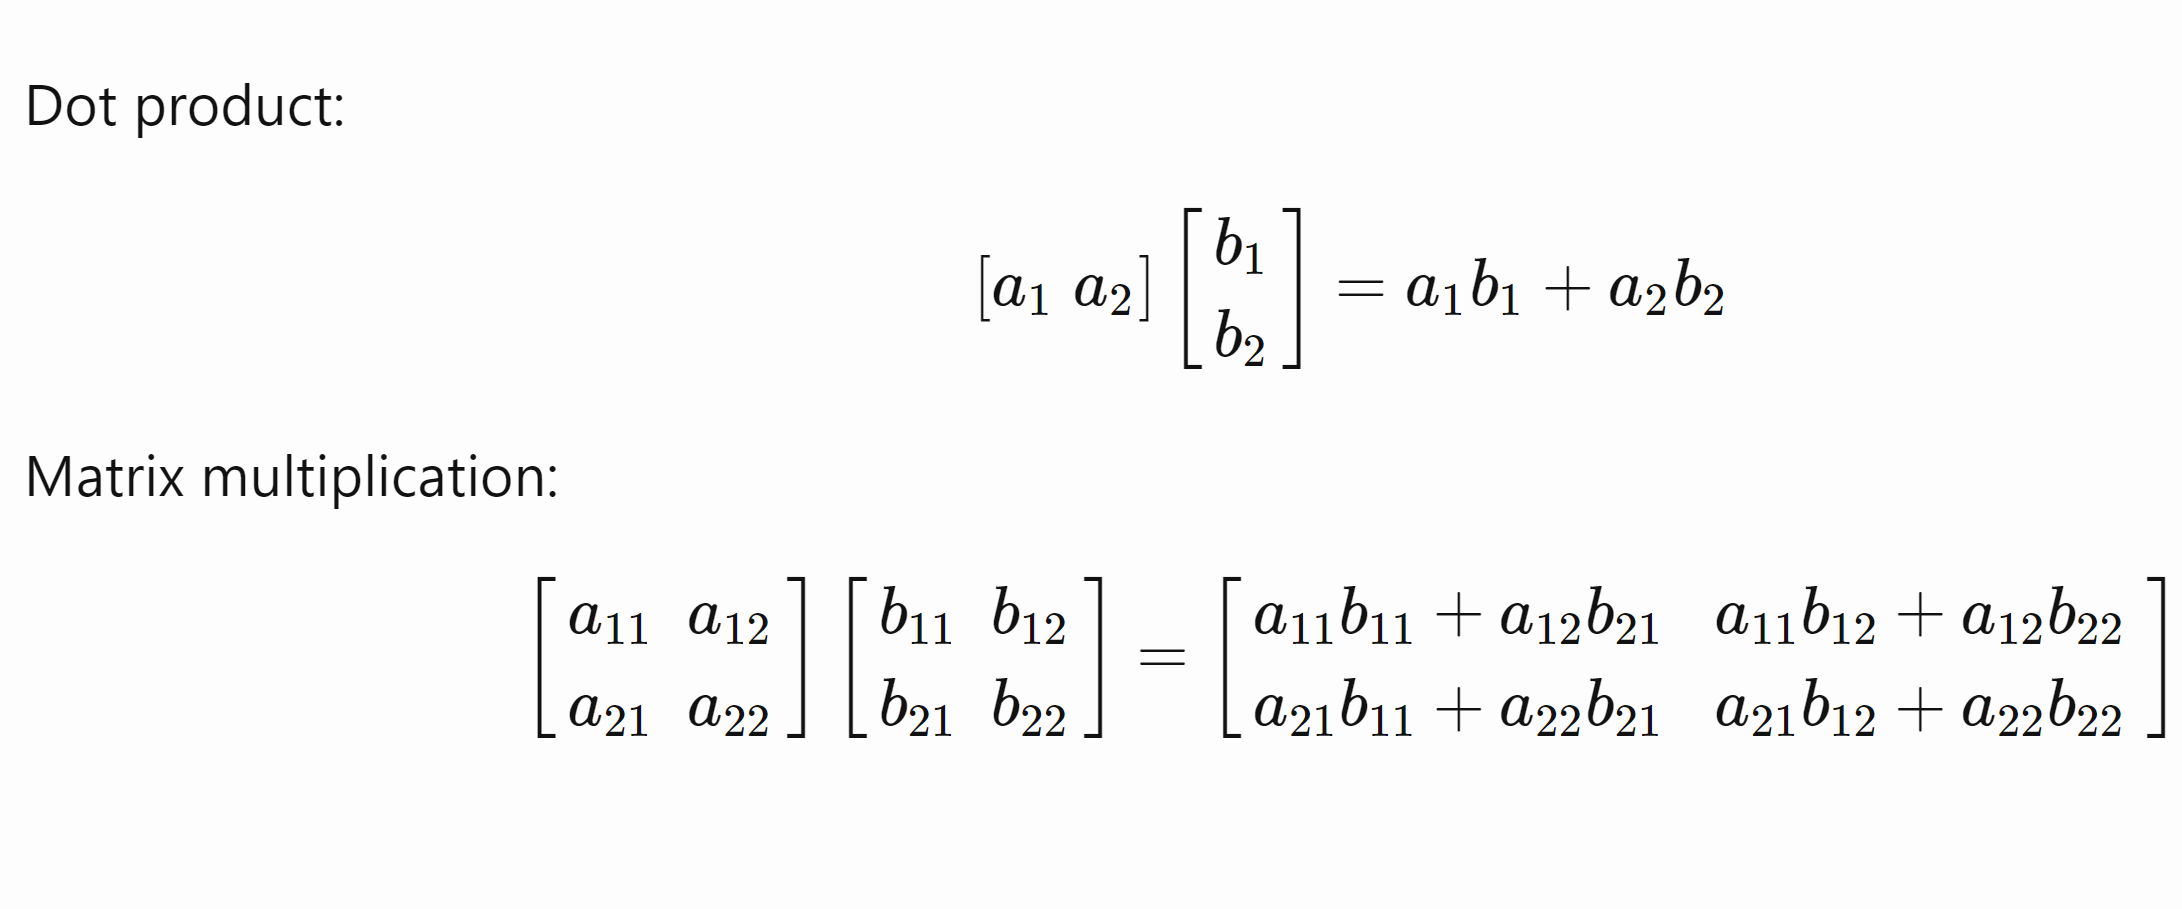

<h6 style="text-align"><b> Dot product</b> 

 Computes the inner product of 1D tensors.\
 ``(10) @ (10) -> (1) ``

In [382]:
t.dot(t)                                           # same as (t * t).sum()                             

tensor(27.)

<h6 style="text-align"><b> Matrix multiplication</b> 

 Performs a matrix multiplication of 2D tensors.\
 **Number of columns in the first tensor should match up with the number of rows in the second tensor!** \
 ``(2, 5) @ (5, 2) -> (2, 2) ``

In [248]:
torch.mm(y.transpose(0, 1), y)                      # same as y.T @ y   

tensor([[ 30,  80],
        [ 80, 255]])

<h6 style="text-align"><b>Batch multiplication</b> 

Performs a batch matrix-matrix product of 3D tensors. \
``(2, 5, 1) @ (2, 1, 5) -> (2, 5, 5)``

In [405]:
batch_product = torch.bmm(b , b.transpose(1, 2))    # same as b @ b.transpose(1, 2)
batch_product

tensor([[[ 0,  0,  0,  0,  0],
         [ 0,  1,  2,  3,  4],
         [ 0,  2,  4,  6,  8],
         [ 0,  3,  6,  9, 12],
         [ 0,  4,  8, 12, 16]],

        [[25, 30, 35, 40, 45],
         [30, 36, 42, 48, 54],
         [35, 42, 49, 56, 63],
         [40, 48, 56, 64, 72],
         [45, 54, 63, 72, 81]]])

<h6 style="text-align"><b>Universal solution for matrix multiplication</b> 

``torch.matmul(tensor1, tensor2)`` a PyTorch equivalent of Python operator ``@``

In [410]:
torch.matmul(t, t)                                  # same as torch.dot(t, t)
torch.matmul(y.T, y)                                # same as torch.mm(y.T, y)
torch.matmul(b, b.transpose(1, 2))                  # same as torch.bmm(b, b.transpose(1, 2))

tensor([[[ 0,  0,  0,  0,  0],
         [ 0,  1,  2,  3,  4],
         [ 0,  2,  4,  6,  8],
         [ 0,  3,  6,  9, 12],
         [ 0,  4,  8, 12, 16]],

        [[25, 30, 35, 40, 45],
         [30, 36, 42, 48, 54],
         [35, 42, 49, 56, 63],
         [40, 48, 56, 64, 72],
         [45, 54, 63, 72, 81]]])

## <h3 style="text-align: center;"><b> Aggregating operations on tensors </b>

<h4 style="text-align: center;"><b> sum (dim) / mean (dim) </b>

In [105]:
batch_product.sum(dim=-1)            # collapsing columns

tensor([[  0,  10,  20,  30,  40],
        [175, 210, 245, 280, 315]])

In [106]:
batch_product.sum(dim=-2)            # collapsing rows

tensor([[  0,  10,  20,  30,  40],
        [175, 210, 245, 280, 315]])

After aggregating, you may end up with a one-element tensor,\
you can convert it to a Python numerical value using ``item()``.

In [103]:
batch_product.sum().item()

1325

<h4 style="text-align: center;"><b> max (dim) / min (dim)</b>

Returns a **namedtuple (values, indices)** \
where ``values`` is the maximum/minimum value of each row of the tensor in a given dimension.\
And ``indices`` is the index of each maximum/minimum value found (``argmin``).

In [92]:
values, indices = batch_product.max(dim=1)
print(values)
print(indices)

tensor([[ 0,  4,  8, 12, 16],
        [45, 54, 63, 72, 81]])
tensor([[0, 4, 4, 4, 4],
        [4, 4, 4, 4, 4]])


In [70]:
batch_product.max() 

tensor(81)

<h4 style="text-align: center;"><b> argmax (dim) / argmin (dim)</b> 

Returns the **indices** of the maximum/minimum values of a tensor across a dimension.

In [74]:
batch_product.argmax(dim=1)

tensor([[0, 4, 4, 4, 4],
        [4, 4, 4, 4, 4]])

<h4 style="text-align: center;"><b>topk ( k, dim, largest )</b> 

Returns a **namedtuple of (values, indices)** \
with values and indices of ``k`` largest/smallest elements of a tensor along ``dim``.

In [102]:
values, integers = batch_product.topk(k=1, dim=1, largest=False)
print("Values:", values)
print("Indices:", indices)

Values: tensor([[[ 0,  0,  0,  0,  0]],

        [[25, 30, 35, 40, 45]]])
Indices: tensor([[0, 4, 4, 4, 4],
        [4, 4, 4, 4, 4]])


<h3 style="text-align: center;"><b> Standard NumPy indexing and slicing </b>

In [115]:
tensor = torch.arange(15).view(5, 3)

print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")

tensor[:,1] = 0 # zero-out second column
print(tensor)

First row: tensor([0, 1, 2])
First column: tensor([ 0,  3,  6,  9, 12])
Last column: tensor([ 2,  5,  8, 11, 14])
tensor([[ 0,  0,  2],
        [ 3,  0,  5],
        [ 6,  0,  8],
        [ 9,  0, 11],
        [12,  0, 14]])


<h3 style="text-align: center;"><b> Masked indexing</b>

In [230]:
a = torch.arange(9)
b = torch.clone(a)      # creates a copy of tensor a

# generating random indices and performing assignment 
negative_indices = torch.randint(low=0, high=9, size=(4,))
b[negative_indices] = b[negative_indices] * (-1) 

# reshaping from 1d to 2d
a = a.view(3, 3)
b = b.view(3, 3)

print(a)
print(b)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[ 0, -1,  2],
        [ 3,  4,  5],
        [-6,  7, -8]])


<h6 style="text-align"><b>Computes element-wise equality</b> 

In [371]:
a.eq(b)                   # same as a == b 

tensor([[False,  True, False],
        [False, False, False],
        [False, False, False]])

<h6 style="text-align"><b>Computes element-wise disequality</b> 

In [372]:
a.ne(b)                    # same as a != b 

tensor([[ True, False,  True],
        [ True,  True,  True],
        [ True,  True,  True]])

<h6 style="text-align"><b>Selecting elements via boolean mask</b> 

In [232]:
b[a > b]

tensor([-1, -6, -8])

## <h3 style="text-align: center;"><b> Joining multiple tensors </b>

In [165]:
# create 2 tensors 
t1 = torch.arange(6).view(2, 3)
t2 = torch.arange(6).view(2, 3)
t1, t2

(tensor([[0, 1, 2],
         [3, 4, 5]]),
 tensor([[0, 1, 2],
         [3, 4, 5]]))

<h4 style="text-align: center;"><b>torch.cat ( (tensors), dim=0 )</b> 

In [155]:
print("Concat tensors one on top of the other (default):")
print(torch.cat((t1, t2), dim=0))

Concat tensors one on top of the other (default):
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])


In [156]:
print("Concat tensors side by side:")
print(torch.cat((t1, t2), dim=1))

Concat tensors side by side:
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])


<h4 style="text-align: center;"><b>torch.stack ( (tensors), dim=0 )</b> 

``dim`` is a new dimension to insert

In [167]:
torch.stack((t1, t2), dim=0)

tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])

**Difference between ``torch.stack`` and ``torch.cat``** :\
``torch.stack`` creates a new dimension to stack tensors, while ``torch.cat`` not.

## <h3 style="text-align: center;"><b> Practice </b>

1. Create a 2D tensor and add a batch dimension of size 1
2. Create a random tensor of shape 5x3 in the interval [3, 7)
3. Create a tensor with values from a normal with mean=0, std=3
4. Perform a batch product between 3D tensors
5. Return a batch matrix product between a 3D tensor and a 2D tensor